In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pandas.read_csv('data/telecom_churn.csv')

# Churn dataset overiew

In [3]:
data.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

In overall there is 8 continous variables, and three binary variables. There is 3333 rows. The target variable is the churn variable, which is a binary variable indicating whether the customer has churned or not. The churn rate is 26.54% in the dataset.  

In [4]:
data.shape

(3333, 11)

In [5]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

There is none missing value in the dataset.

## Distribution of variables

### Churn

- 1 if customer cancelled service, 0 if not

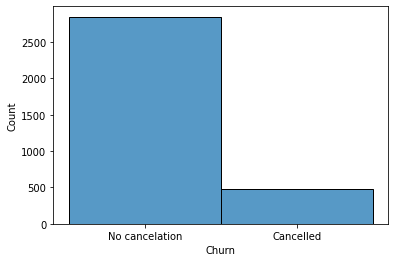

In [6]:
sns.histplot(data['Churn'],discrete=True)
plt.xticks([0,1],['No cancelation','Cancelled']);

In [7]:
len(data[data['Churn'] == 1]) / len(data)

0.14491449144914492

Churn rate in thes dataset is 14.49%.

### AccountWeeks
- number of weeks customer has had active account

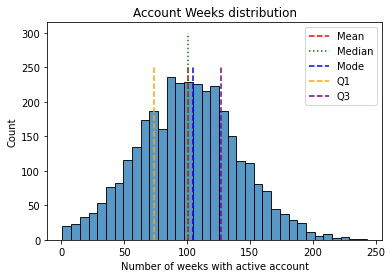

In [8]:
sns.histplot(data['AccountWeeks'])
plt.xlabel('Number of weeks with active account');
plt.vlines(data['AccountWeeks'].mean(),0,250,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['AccountWeeks'].median(),0,300,color='green',label='Median', linestyles='dotted')
plt.vlines(data['AccountWeeks'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['AccountWeeks'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['AccountWeeks'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.legend();

### ContractRenewal
- 1 if customer recently renewed contract, 0 if not

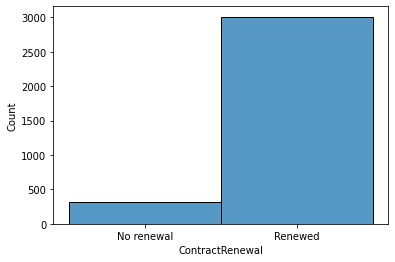

In [9]:
sns.histplot(data['ContractRenewal'],discrete=True)
plt.xticks([0,1],['No renewal','Renewed']);

### DataPlan
- 1 if customer has data plan, 0 if not

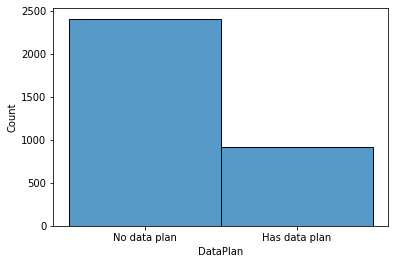

In [10]:
sns.histplot(data['DataPlan'],discrete=True)
plt.xticks([0,1],['No data plan','Has data plan']);

### DataUsage
- gigabytes of monthly data usage

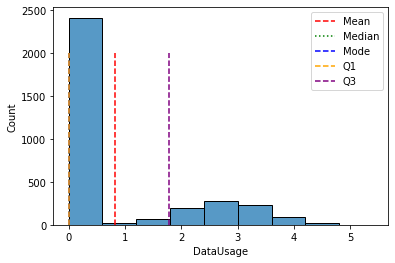

In [11]:
sns.histplot(data['DataUsage'],bins=9)
plt.vlines(data['DataUsage'].mean(),0,2000,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['DataUsage'].median(),0,2000,color='green',label='Median', linestyles='dotted')
plt.vlines(data['DataUsage'].mode()[0],0,2000,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DataUsage'].quantile(0.25),0,2000,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DataUsage'].quantile(0.75),0,2000,color='purple',label='Q3', linestyles='dashed')
plt.legend();

### CustServCalls
- number of calls into customer service

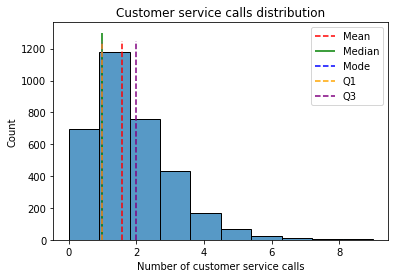

In [12]:
sns.histplot(data['CustServCalls'],bins=10)
plt.title('Customer service calls distribution')
plt.vlines(data['CustServCalls'].mean(),0,1250,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['CustServCalls'].median(),0,1300,color='green',label='Median', linestyles='solid')
plt.vlines(data['CustServCalls'].mode()[0],0,1250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['CustServCalls'].quantile(0.25),0,1250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['CustServCalls'].quantile(0.75),0,1250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('Number of customer service calls')
plt.legend();

### DayMins
- average daytime minutes spend during calls per month

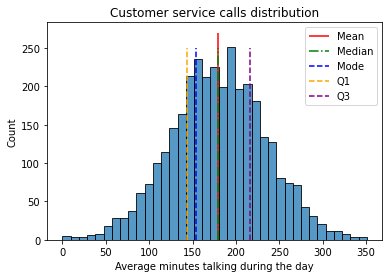

In [13]:
sns.histplot(data['DayMins'])
plt.title('Customer service calls distribution')
plt.vlines(data['DayMins'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['DayMins'].median(),0,250,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['DayMins'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DayMins'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DayMins'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('Average minutes talking during the day');
plt.legend();

### DayCalls
- average number of daytime calls

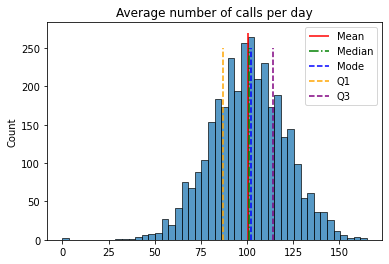

In [14]:
sns.histplot(data['DayCalls']);
plt.title('Average number of calls per day')
plt.vlines(data['DayCalls'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['DayCalls'].median(),0,250,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['DayCalls'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DayCalls'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DayCalls'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

### MonthlyCharge
- average monthly bill

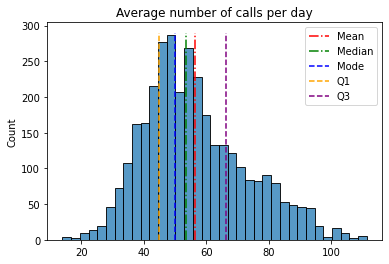

In [15]:
sns.histplot(data['MonthlyCharge']);
plt.title('Average number of calls per day')
plt.vlines(data['MonthlyCharge'].mean(),0,290,color='red',label='Mean' , linestyles='dashdot')
plt.vlines(data['MonthlyCharge'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['MonthlyCharge'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['MonthlyCharge'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['MonthlyCharge'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

### OverageFee
- largest overage fee in last 12 months

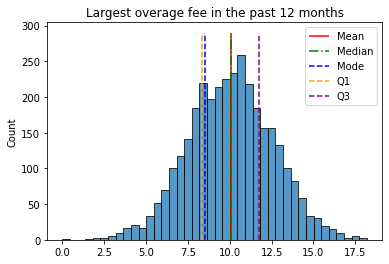

In [16]:
sns.histplot(data['OverageFee']);
plt.title('Largest overage fee in the past 12 months')
plt.vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

### RoamMins
- average number of roaming minutes

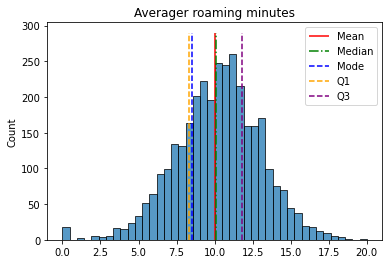

In [17]:
sns.histplot(data['RoamMins']);
plt.title('Averager roaming minutes')
plt.vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

## Asociation between variables 

### Heatmap

In [18]:
data.corr()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCalls   DayMins  DayCalls  MonthlyCharge  OverageFee  \
Churn                 0.208750  0.205151  0.018459       0.072313    0.092812   
AccountWeeks         -0.003796  0.006216  0.038470       0.012581   -0.006749   
ContractRenewal       0.024522 -0.049396 -0.003755      -0.047291   -0.019105   
DataPlan             -0.017824 -0.001684 -0.011086       0.737490    0.021526   
DataUsage            -0.021723  0.003176 -0.007962       0.781660    0.019637   
CustServCalls         1.000000 -0.013423 -0.018942      -0.028017   -0.012964   
DayMins              -0.013423  1.000000  0.006750       0.567968    0.007038   
DayCalls             -0.018942  0.006750  1.000000      -0.007963   -0.021449   
MonthlyCharge        -0.028017  0.567968 -0.007963       1.000000    0.281766   
OverageFee           -0.012964  0.007038 -0.021449       0.281766    1.000000   
RoamMins             -0.009640 -0.010155  0.021565       0.117433   -0.011023   

                 RoamMins  
Churn            0.068239  
AccountWeeks     0.009514  
ContractRenewal -0.045871  
DataPlan        -0.001318  
DataUsage        0.162746  
CustServCalls   -0.009640  
DayMins         -0.010155  
DayCalls         0.021565  
MonthlyCharge    0.117433  
OverageFee      -0.011023  
RoamMins         1.000000

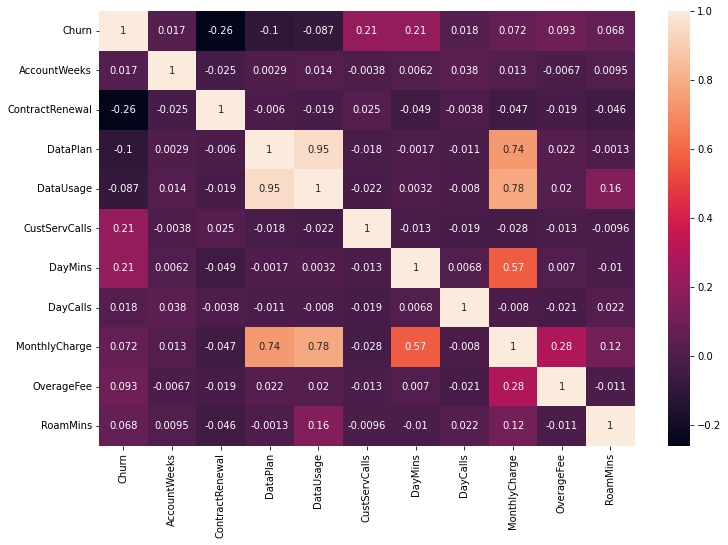

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True);

### Boxplots between categorical variables and contionous

<AxesSubplot:xlabel='ContractRenewal', ylabel='RoamMins'>

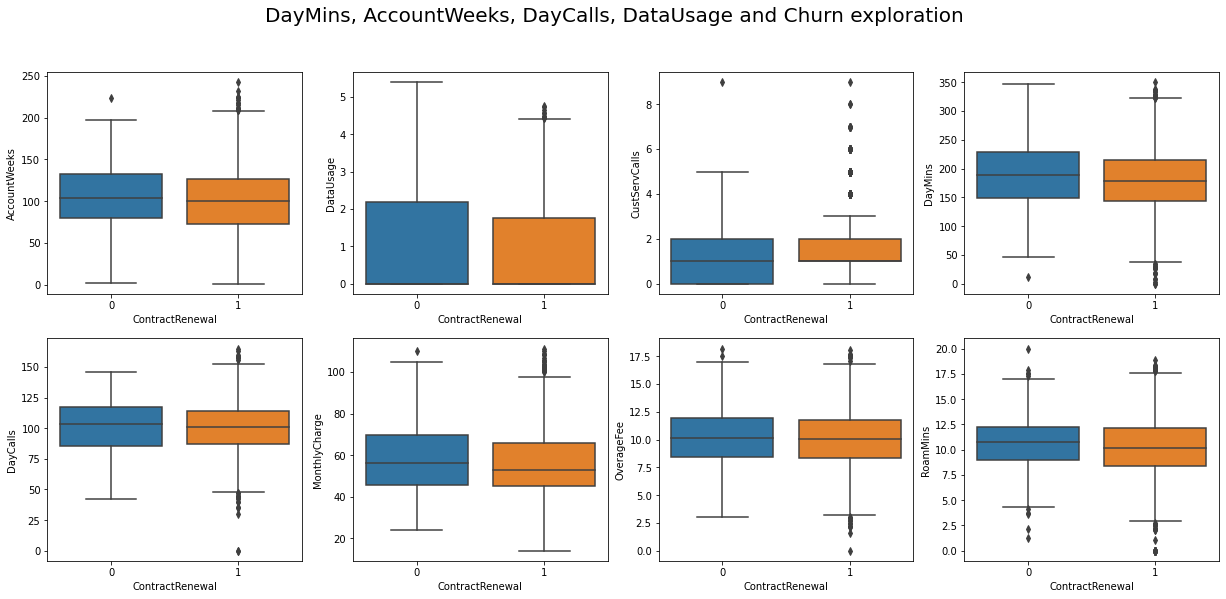

In [34]:
# Continous variables and ContractRenewal
fig , ax = plt.subplots(2, 4,figsize=(21,9))

plt.suptitle('DayMins, AccountWeeks, DayCalls, DataUsage and Churn exploration', fontsize=20)

sns.boxplot(x = data['ContractRenewal'],y = data['AccountWeeks'],ax=ax[0,0])
sns.boxplot(x = data['ContractRenewal'],y = data['DataUsage'],ax=ax[0,1])
sns.boxplot(x = data['ContractRenewal'],y = data['CustServCalls'],ax=ax[0,2])
sns.boxplot(x = data['ContractRenewal'],y = data['DayMins'],ax=ax[0,3])

sns.boxplot(x = data['ContractRenewal'],y = data['DayCalls'],ax=ax[1,0])
sns.boxplot(x = data['ContractRenewal'],y = data['MonthlyCharge'],ax=ax[1,1])
sns.boxplot(x = data['ContractRenewal'],y = data['OverageFee'],ax=ax[1,2])
sns.boxplot(x = data['ContractRenewal'],y = data['RoamMins'],ax=ax[1,3])

<AxesSubplot:xlabel='Churn', ylabel='RoamMins'>

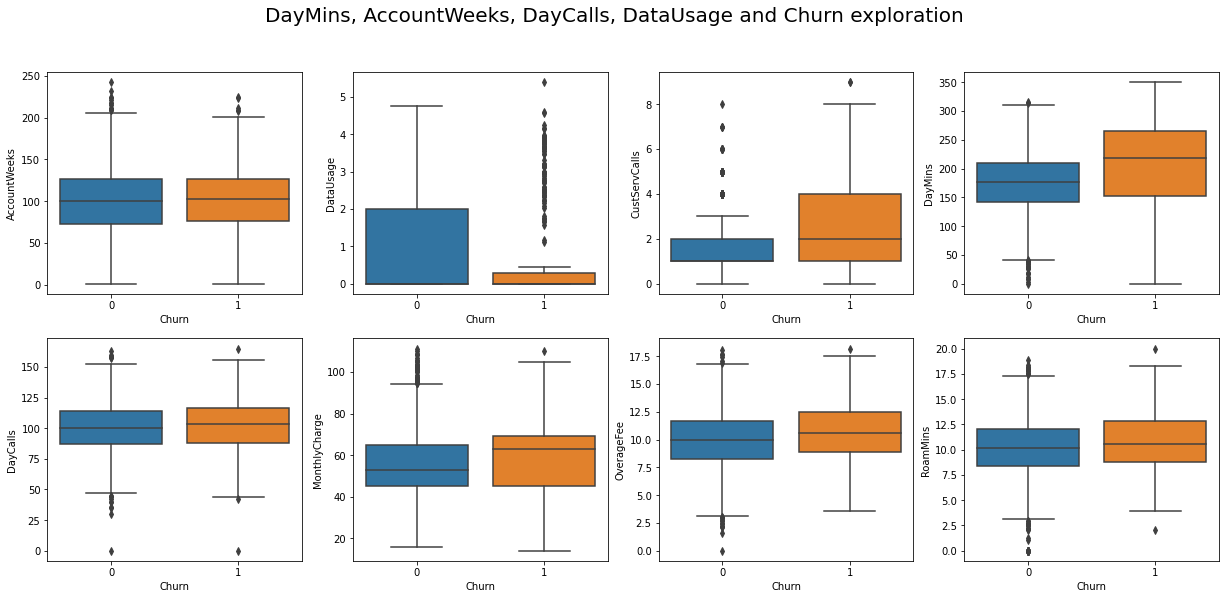

In [33]:
# Continous variables and Churn exploration
 		
fig , ax = plt.subplots(2, 4,figsize=(21,9))

plt.suptitle('DayMins, AccountWeeks, DayCalls, DataUsage and Churn exploration', fontsize=20)

sns.boxplot(x = data['Churn'],y = data['AccountWeeks'],ax=ax[0,0])
sns.boxplot(x = data['Churn'],y = data['DataUsage'],ax=ax[0,1])
sns.boxplot(x = data['Churn'],y = data['CustServCalls'],ax=ax[0,2])
sns.boxplot(x = data['Churn'],y = data['DayMins'],ax=ax[0,3])

sns.boxplot(x = data['Churn'],y = data['DayCalls'],ax=ax[1,0])
sns.boxplot(x = data['Churn'],y = data['MonthlyCharge'],ax=ax[1,1])
sns.boxplot(x = data['Churn'],y = data['OverageFee'],ax=ax[1,2])
sns.boxplot(x = data['Churn'],y = data['RoamMins'],ax=ax[1,3])

- Users that churned tend to have lesser DataUsage
- Users that churned tend to have more Customer service calls
- Users that churned tend to have higher average Monthly charge 

<AxesSubplot:xlabel='DataPlan', ylabel='RoamMins'>

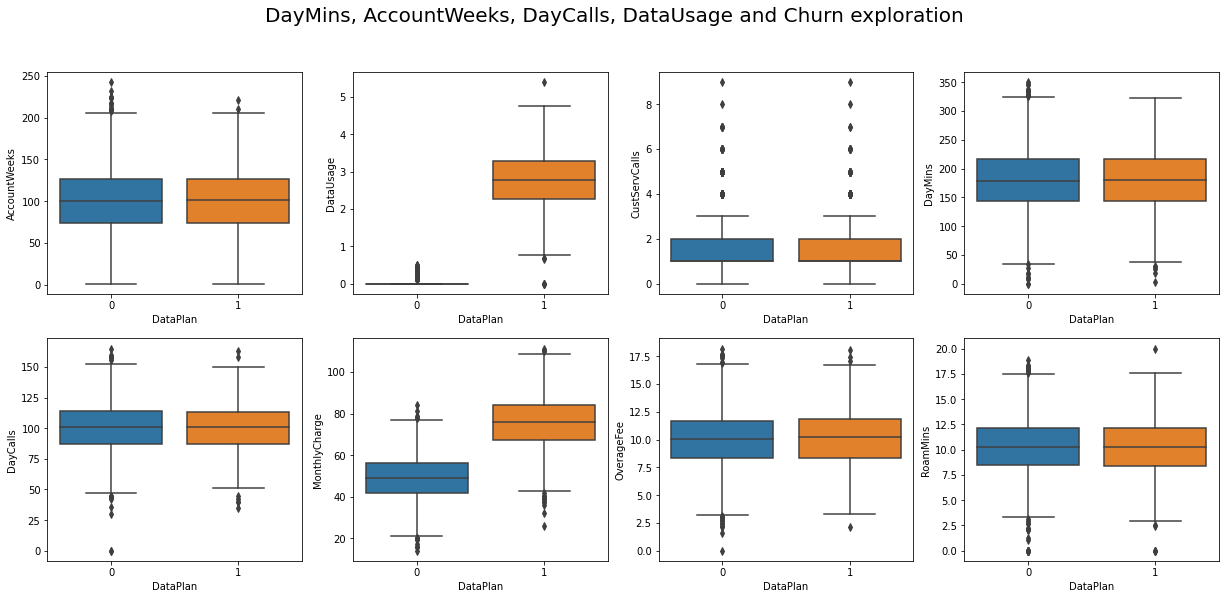

In [35]:
# Continous variables and Churn exploration
 		
fig , ax = plt.subplots(2, 4,figsize=(21,9))

plt.suptitle('DayMins, AccountWeeks, DayCalls, DataUsage and Churn exploration', fontsize=20)

sns.boxplot(x = data['DataPlan'],y = data['AccountWeeks'],ax=ax[0,0])
sns.boxplot(x = data['DataPlan'],y = data['DataUsage'],ax=ax[0,1])
sns.boxplot(x = data['DataPlan'],y = data['CustServCalls'],ax=ax[0,2])
sns.boxplot(x = data['DataPlan'],y = data['DayMins'],ax=ax[0,3])

sns.boxplot(x = data['DataPlan'],y = data['DayCalls'],ax=ax[1,0])
sns.boxplot(x = data['DataPlan'],y = data['MonthlyCharge'],ax=ax[1,1])
sns.boxplot(x = data['DataPlan'],y = data['OverageFee'],ax=ax[1,2])
sns.boxplot(x = data['DataPlan'],y = data['RoamMins'],ax=ax[1,3])

- Users that have data plan obviously have higher monthly charges and data usage

### Scatter plots

<AxesSubplot:xlabel='AccountWeeks', ylabel='DayCalls'>

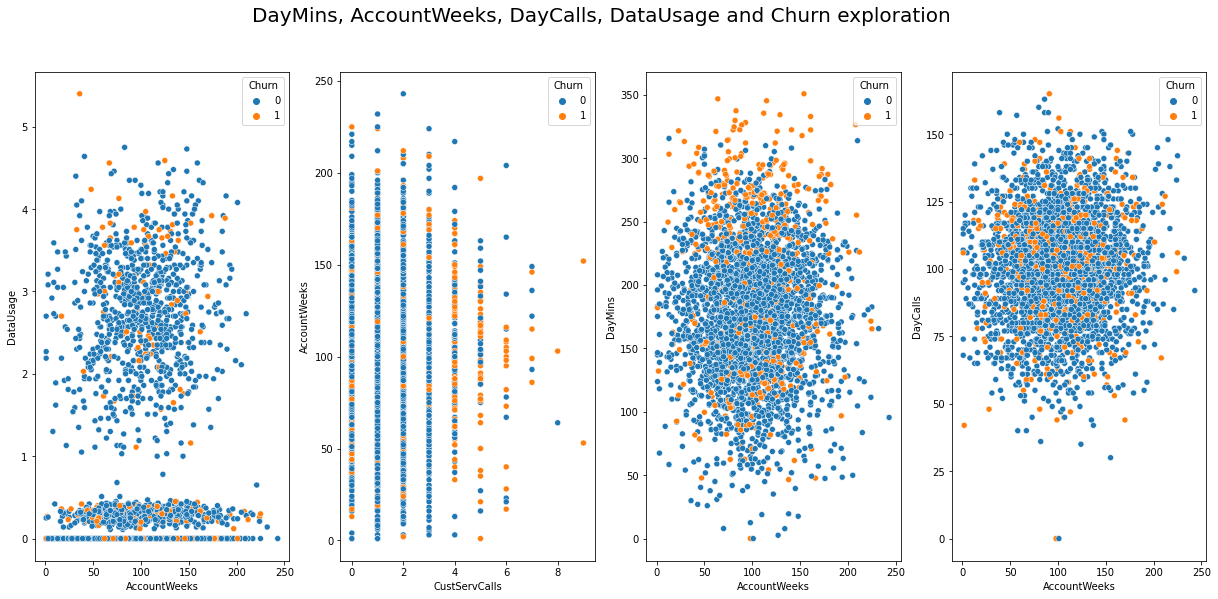

In [41]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 4,figsize=(21,9))

plt.suptitle('DayMins, AccountWeeks, DayCalls, DataUsage and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='AccountWeeks',y ='DataUsage',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'CustServCalls',y ='AccountWeeks' ,hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'AccountWeeks',y = 'DayMins',hue = 'Churn',ax=ax[2])
sns.scatterplot(data =data,x = 'AccountWeeks',y = 'DayCalls',hue = 'Churn',ax=ax[3])

<AxesSubplot:xlabel='AccountWeeks', ylabel='RoamMins'>

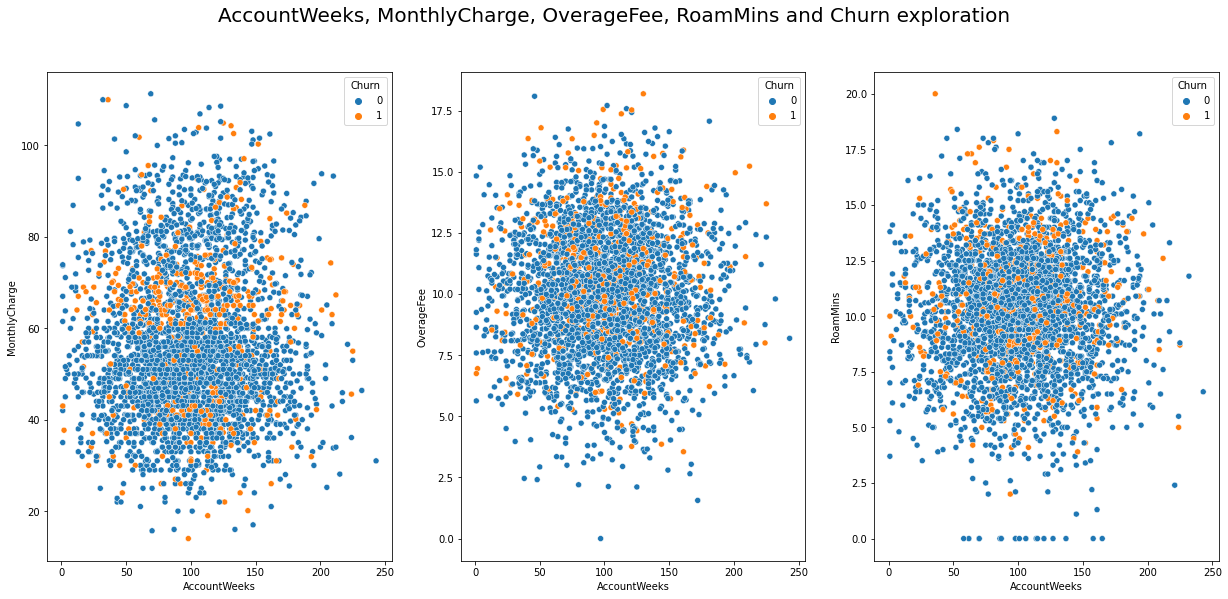

In [39]:
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('AccountWeeks, MonthlyCharge, OverageFee, RoamMins and Churn exploration', fontsize=20)

sns.scatterplot(data =data,x = 'AccountWeeks',y = 'MonthlyCharge',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'AccountWeeks',y = 'OverageFee',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'AccountWeeks',y = 'RoamMins',hue = 'Churn',ax=ax[2])

<AxesSubplot:xlabel='DataUsage', ylabel='DayCalls'>

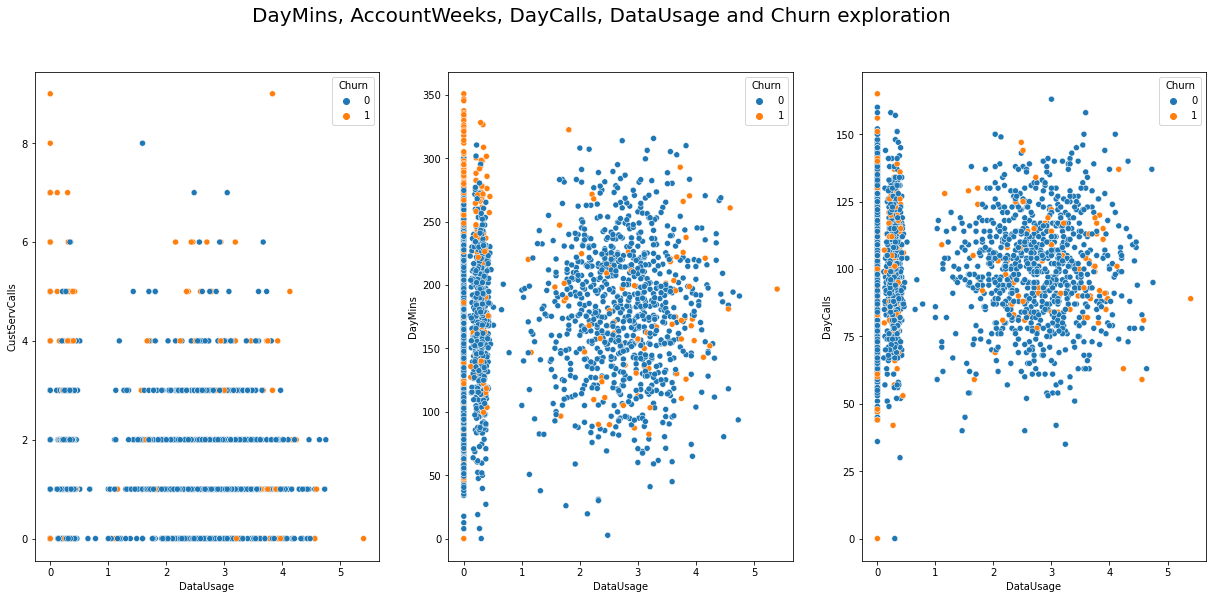

In [42]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('DataUsage, CustServCalls, DayMins, DayCalls and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='DataUsage',y ='CustServCalls',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'DataUsage',y = 'DayMins',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'DataUsage',y = 'DayCalls',hue = 'Churn',ax=ax[2])

<AxesSubplot:xlabel='DataUsage', ylabel='RoamMins'>

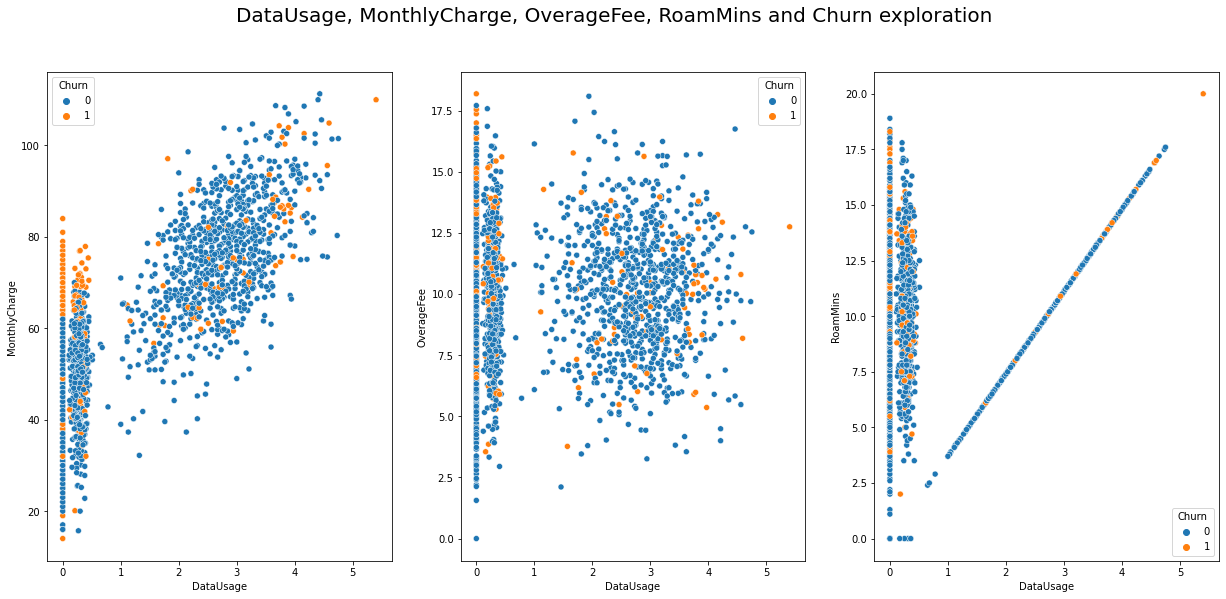

In [44]:
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('DataUsage, MonthlyCharge, OverageFee, RoamMins and Churn exploration', fontsize=20)

sns.scatterplot(data =data,x = 'DataUsage',y = 'MonthlyCharge',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'DataUsage',y = 'OverageFee',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'DataUsage',y = 'RoamMins',hue = 'Churn',ax=ax[2])

<AxesSubplot:xlabel='CustServCalls', ylabel='MonthlyCharge'>

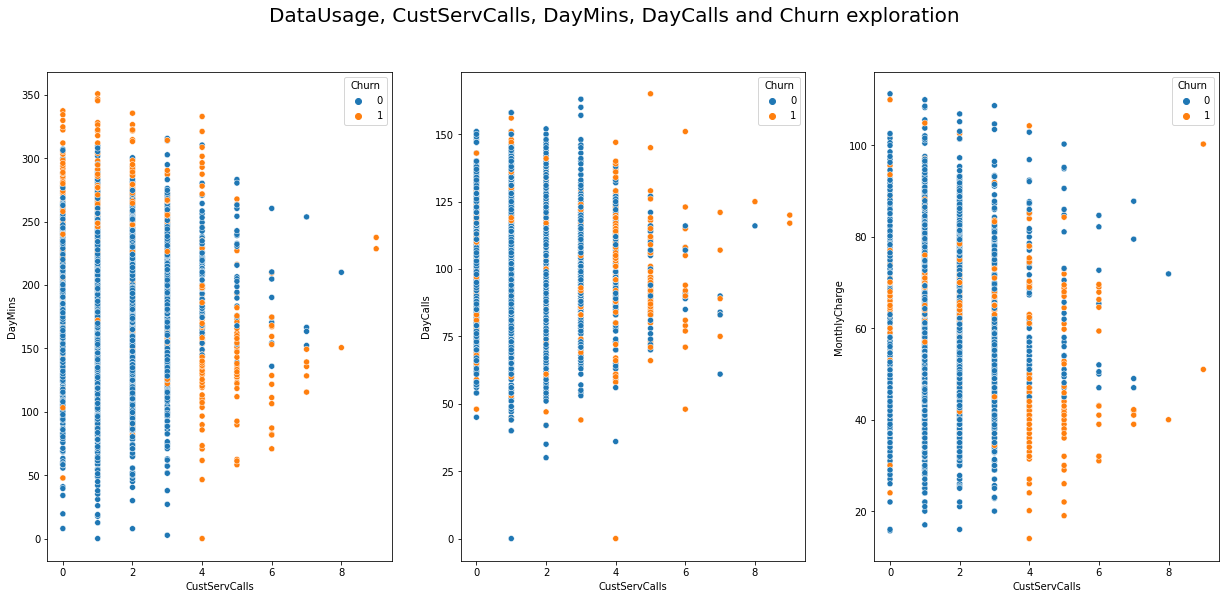

In [46]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('DataUsage, CustServCalls, DayMins, DayCalls and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='CustServCalls',y ='DayMins',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'CustServCalls',y = 'DayCalls',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'CustServCalls',y = 'MonthlyCharge',hue = 'Churn',ax=ax[2])

<AxesSubplot:xlabel='CustServCalls', ylabel='RoamMins'>

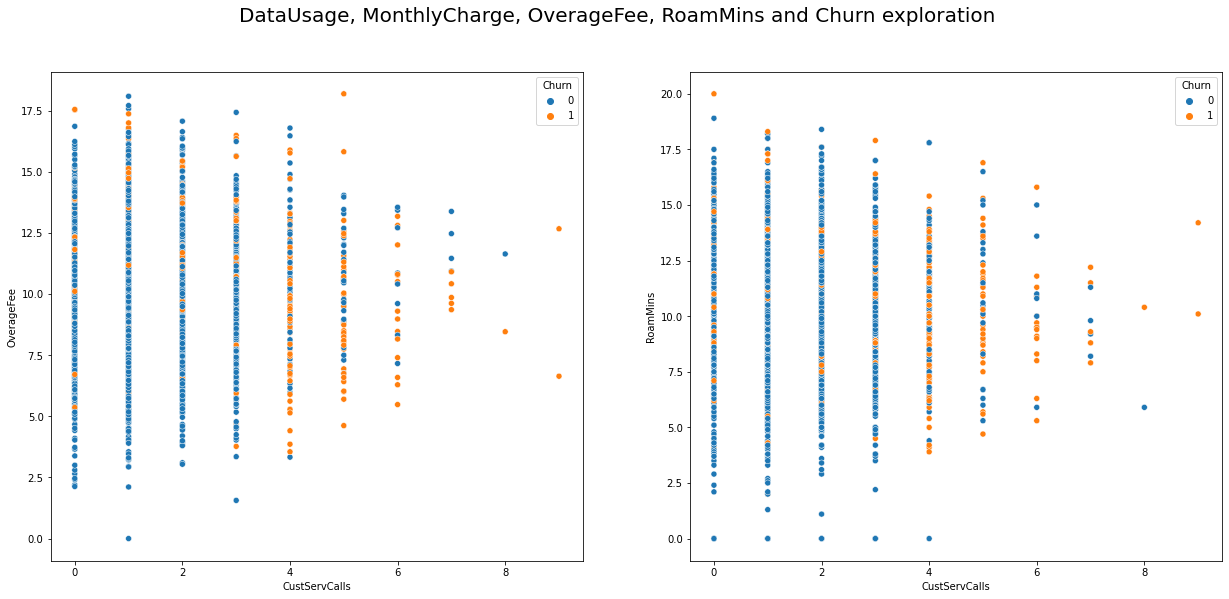

In [45]:
fig , ax = plt.subplots(1, 2,figsize=(21,9))

plt.suptitle('DataUsage, MonthlyCharge, OverageFee, RoamMins and Churn exploration', fontsize=20)

sns.scatterplot(data =data,x = 'CustServCalls',y = 'OverageFee',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'CustServCalls',y = 'RoamMins',hue = 'Churn',ax=ax[1])

<AxesSubplot:xlabel='DayMins', ylabel='MonthlyCharge'>

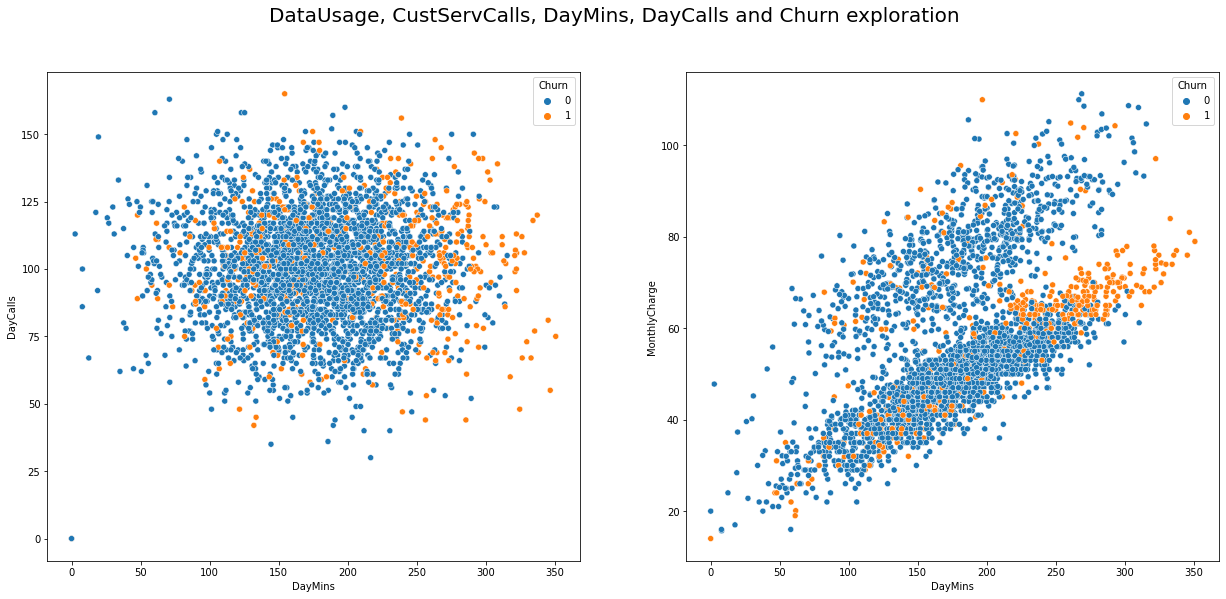

In [47]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 2,figsize=(21,9))

plt.suptitle('DataUsage, CustServCalls, DayMins, DayCalls and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='DayMins',y ='DayCalls',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'DayMins',y = 'MonthlyCharge',hue = 'Churn',ax=ax[1])

<AxesSubplot:xlabel='DayMins', ylabel='RoamMins'>

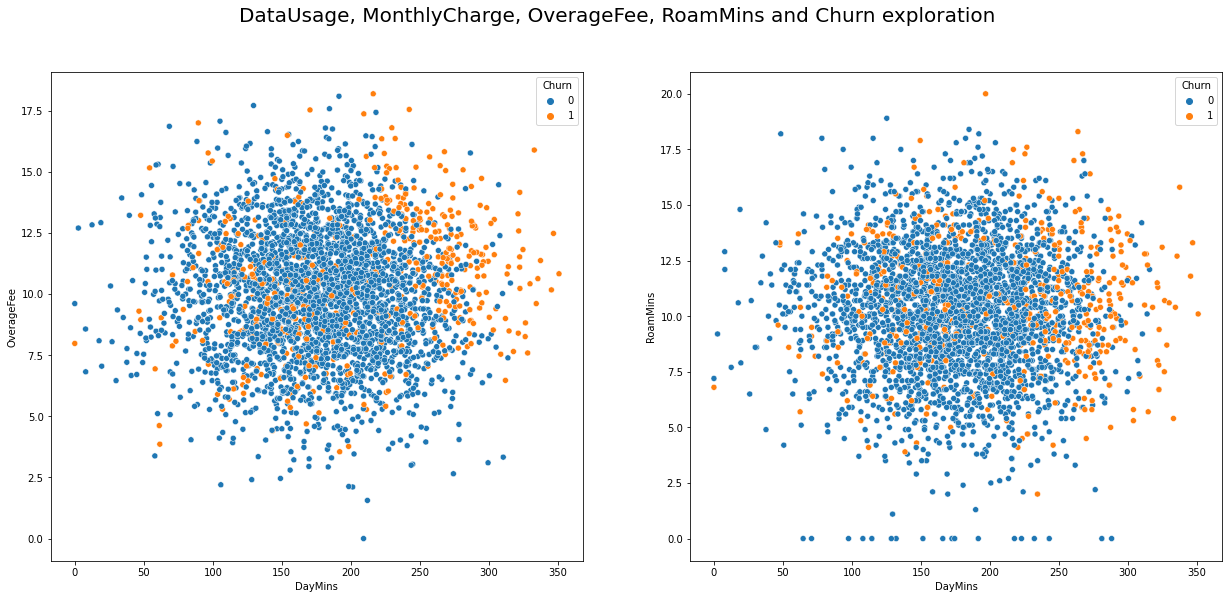

In [48]:
fig , ax = plt.subplots(1, 2,figsize=(21,9))

plt.suptitle('DataUsage, MonthlyCharge, OverageFee, RoamMins and Churn exploration', fontsize=20)

sns.scatterplot(data =data,x = 'DayMins',y = 'OverageFee',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'DayMins',y = 'RoamMins',hue = 'Churn',ax=ax[1])

<AxesSubplot:xlabel='DayCalls', ylabel='RoamMins'>

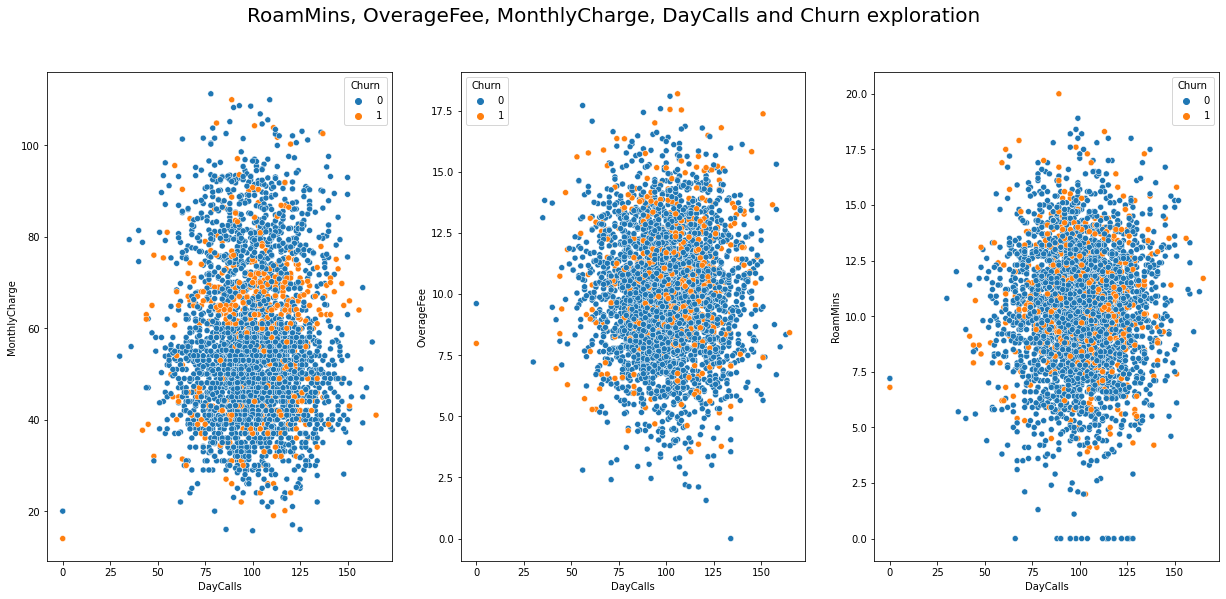

In [49]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('RoamMins, OverageFee, MonthlyCharge, DayCalls and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='DayCalls',y ='MonthlyCharge',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'DayCalls',y = 'OverageFee',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data, x ='DayCalls',y ='RoamMins',hue = 'Churn',ax=ax[2])

<AxesSubplot:xlabel='OverageFee', ylabel='RoamMins'>

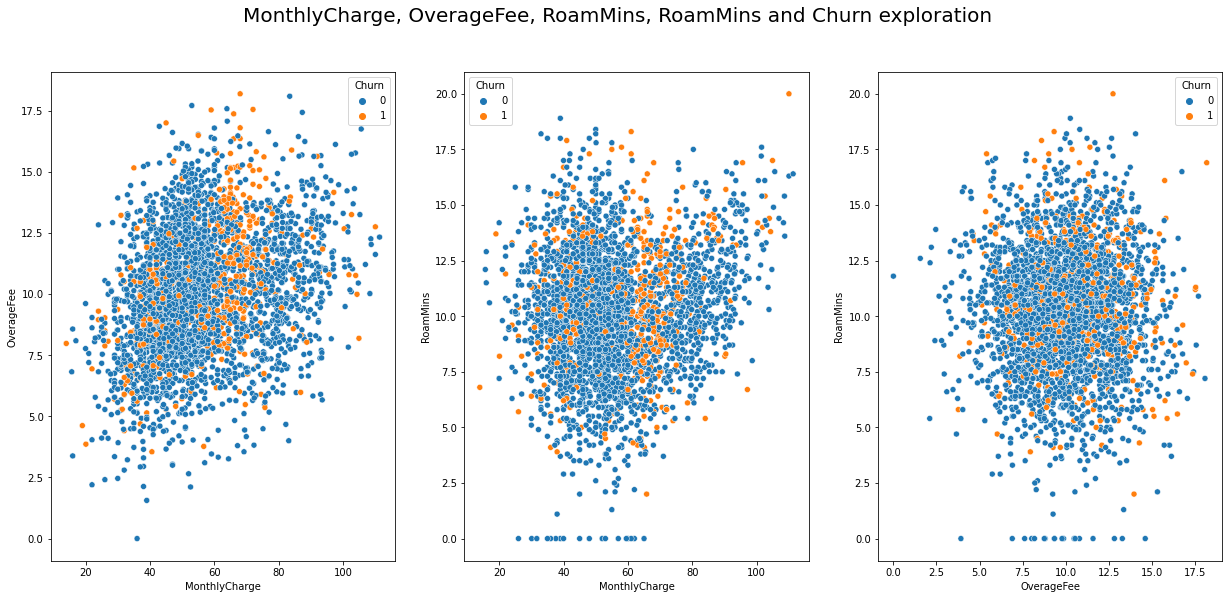

In [50]:
# Continous variables and AccountWeeks
fig , ax = plt.subplots(1, 3,figsize=(21,9))

plt.suptitle('MonthlyCharge, OverageFee, RoamMins, RoamMins and Churn exploration', fontsize=20)

sns.scatterplot(data =data, x ='MonthlyCharge',y ='OverageFee',hue = 'Churn',ax=ax[0])
sns.scatterplot(data =data,x = 'MonthlyCharge',y = 'RoamMins',hue = 'Churn',ax=ax[1])
sns.scatterplot(data =data,x = 'OverageFee',y = 'RoamMins',hue = 'Churn',ax=ax[2])

# Findings